In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import kagglehub

In [2]:
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/arpan/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [3]:
fat = pd.read_csv('/home/arpan/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1/bodyfat.csv')
fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [4]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


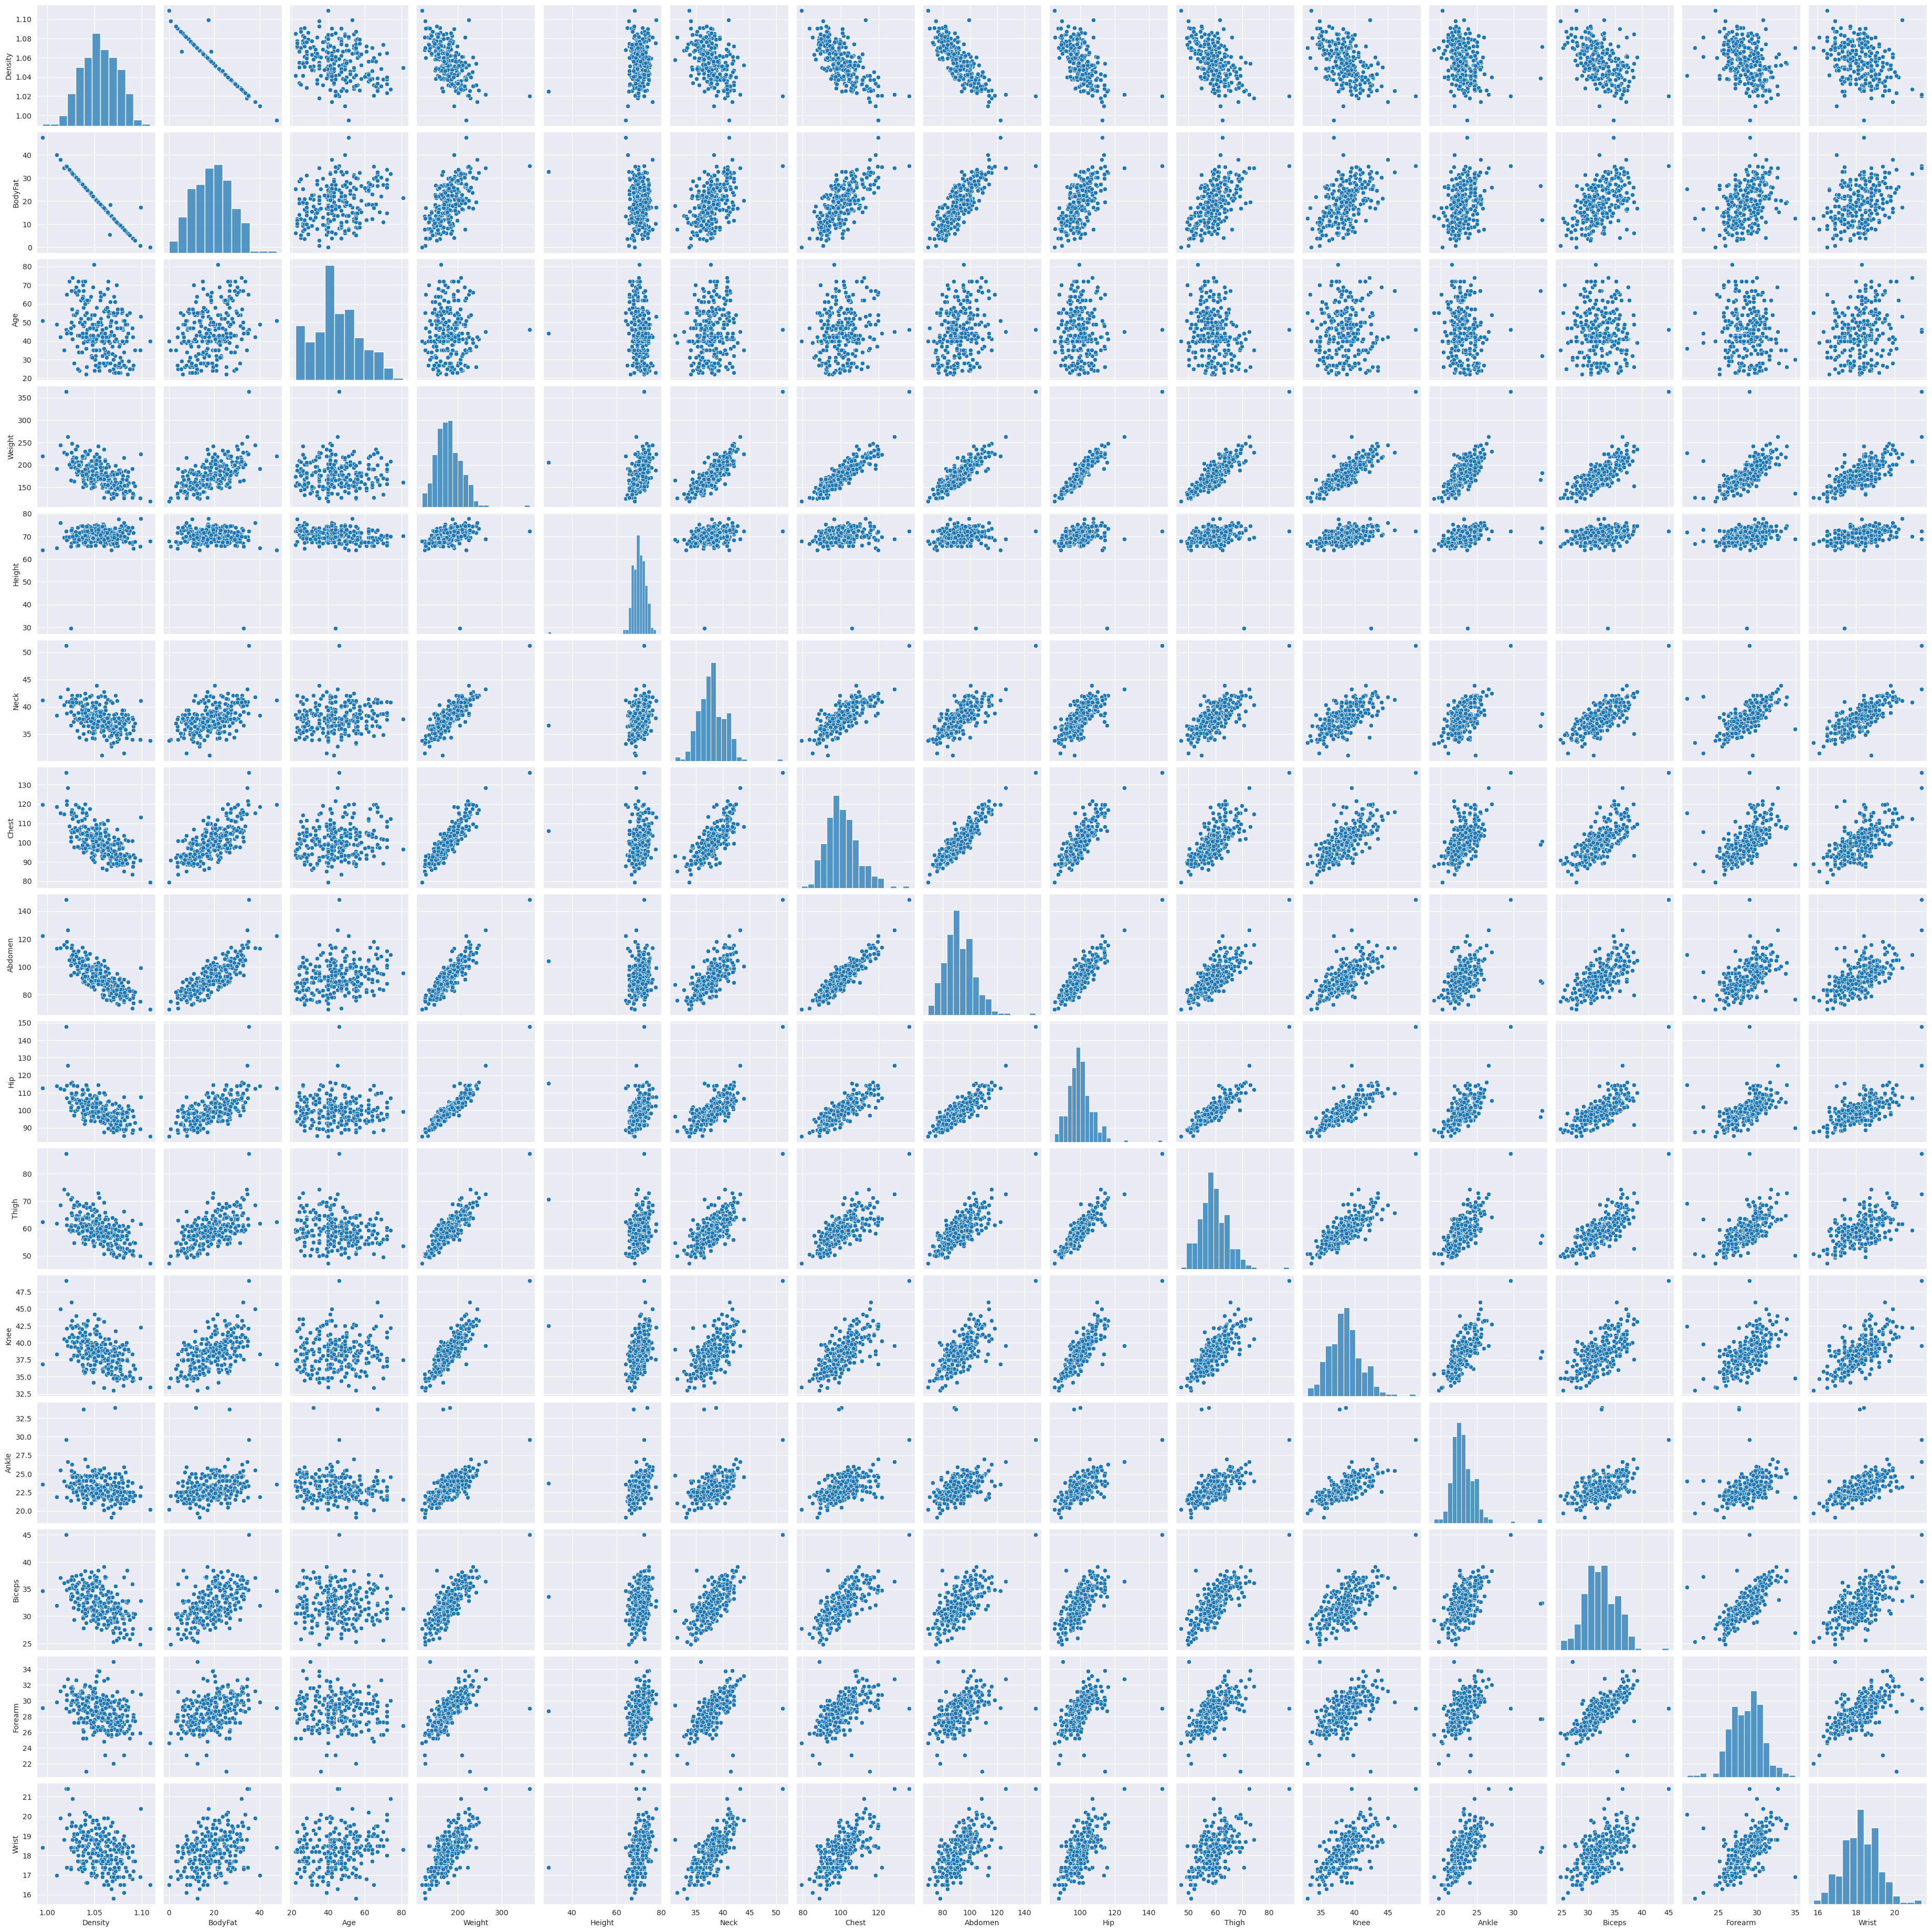

In [5]:
sns.pairplot(fat)

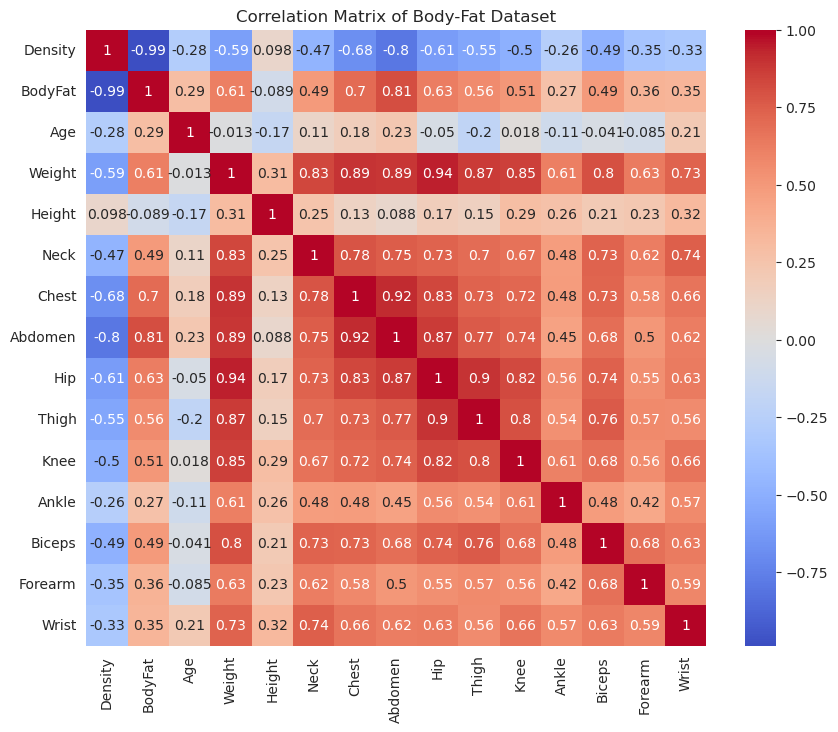

In [6]:
corr_matrix = fat.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Body-Fat Dataset')
plt.show()

In [7]:
y = fat['BodyFat']
X = fat.drop(columns = ['BodyFat'])
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [8]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

# Linear Regression

## Standardize the Dataset

In [9]:
def standardize(X):
    for i in X.columns:
        X[i] = (X[i] - X[i].mean())/X[i].std()
            
    return X

In [10]:
X = standardize(X)
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.800055,-1.736617,-0.839575,-0.654901,-0.737198,-0.916224,-0.682176,-0.754427,-0.077325,-0.535067,-0.709414,-0.090496,-0.625474,-1.210133
1,1.561952,-1.815970,-0.193078,0.573648,0.208949,-0.856916,-0.886199,-0.168168,-0.134468,-0.535067,0.175598,-0.586975,0.116847,-0.031879
2,-0.744758,-1.815970,-0.848082,-1.064418,-1.642207,-0.595958,-0.431783,-0.098375,0.036962,0.128337,0.529602,-1.149652,-1.714210,-1.745703
3,1.025997,-1.498561,0.198223,0.573648,-0.243556,0.115746,-0.570890,0.180797,0.132201,-0.535067,-0.178407,0.041899,0.364287,-0.031879
4,-1.133588,-1.657265,0.181210,0.300637,-1.477660,-0.418032,0.690345,0.278507,0.722682,1.496607,0.529602,-0.024299,-0.477010,-0.567449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.520098,-0.859660,-1.271976,-1.378832,-0.830556,-1.550066,-1.867818,-1.571635,-0.945417,-2.208808,-1.466770,0.289463
248,-1.680053,2.151642,0.751148,-0.108879,1.196232,0.910482,1.154035,0.641430,0.036962,0.916129,0.057596,0.968660,-0.031617,2.003287
249,-1.196642,2.151642,0.266275,-1.132671,0.373496,1.218887,1.756831,0.250590,0.170296,-0.535067,-0.945417,-0.322186,-0.724450,-0.246107
250,-0.823575,2.151642,0.402379,0.095879,0.373496,0.886758,0.810905,-0.293795,-0.648759,1.247831,-0.237408,-0.586975,0.364287,1.681945


## Gradient Descend

In [12]:
def gradient_descend(X, y, learning_rate = 0.01, n_iter = 1000):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]   # to calculate the bias term
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(n_iter):
        h = X @ theta
        loss = (h - y)
        gradient = X.T @ loss / m
        theta = theta - (learning_rate * gradient)
    return theta

In [13]:
gradient_descend(X,y)

array([19.14996689, -7.19902639,  0.24322083, -0.06041829,  0.02063024,
       -0.25057738,  0.20443474,  1.28902516, -0.07156847,  0.09372987,
       -0.07492834, -0.04837253, -0.10312249,  0.20728066, -0.24024931])